<a href="https://colab.research.google.com/github/marinba2200/DL_test/blob/main/RNN_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

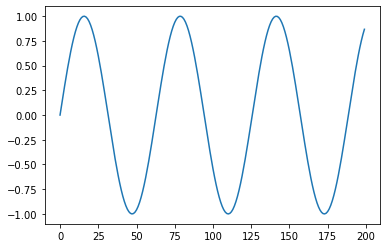

In [ ]:
# make the original data
series = np.sin(0.1*np.arange(1000)) #建一個漂亮ㄉsin波(目前無噪音) #+ np.random.randn(200)*0.1  #這是noise

# plot it
plt.plot(series)
plt.show()

In [ ]:
### build the dataset
# let's see if we can use T past values to predict the next value 
T = 10  #T是要多長去預測，設10就是用10筆10筆去預測(如果把T拉太長，會導致時間上的梯度消失=會忘記過去的事情。如同之前的NN會空間上的梯度消失)
X = []
Y = []
for t in range(len(series) - T): #200-10=190, 0~189
  x = series[t:t+T] #x一次有10筆(任意切十筆，第十一筆是target,就像股票(一樣是監督式學習))
  X.append(x)
  y = series[t+T] #y有1筆
  Y.append(y)

X = np.array(X).reshape(-1, T) #-1指的是剩餘維度，若x有190筆，-1就會變成10。若x有1900筆，-1就會變成100。 #reshape的動作是再設定維度(以防出錯)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape, "N =", N)

X.shape (190, 10) Y.shape (190,) N = 190


In [ ]:
### try autoregressive linear model
i = Input(shape=(T,)) #input是10
x = Dense(1)(i)  #前方維度是y(1維)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1)) 

# train the model
r = model.fit(X[:N//2], Y[:N//2], epochs=80, validation_data=(X[N//2:], Y[N//2:]))

Epoch 1/80
3/3 [==============================] - 0s 63ms/step - loss: 1.4310 - val_loss: 0.3803
Epoch 2/80
3/3 [==============================] - 0s 9ms/step - loss: 0.7985 - val_loss: 0.7271
Epoch 3/80
3/3 [==============================] - 0s 7ms/step - loss: 0.5996 - val_loss: 0.1491
Epoch 4/80
3/3 [==============================] - 0s 6ms/step - loss: 0.1272 - val_loss: 0.2094
Epoch 5/80
3/3 [==============================] - 0s 7ms/step - loss: 0.3007 - val_loss: 0.1793
Epoch 6/80
3/3 [==============================] - 0s 8ms/step - loss: 0.1447 - val_loss: 0.0230
Epoch 7/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0425 - val_loss: 0.1370
Epoch 8/80
3/3 [==============================] - 0s 7ms/step - loss: 0.1136 - val_loss: 0.0669
Epoch 9/80
3/3 [==============================] - 0s 7ms/step - loss: 0.0302 - val_loss: 0.0099
Epoch 10/80
3/3 [==============================] - 0s 6ms/step - loss: 0.0288 - val_loss: 0.0649
Epoch 11/80
3/3 [=====================

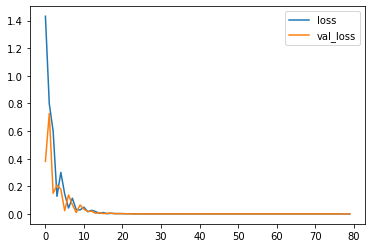

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# "Wrong" forecast using true targets

validation_target = Y[N//2:] #取後面的做預測
validation_predictions = [] 

# index of first validation input
i = N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0,0] # 1x1 array -> scalar #九個已知，一個未知做預測。然後越來越多預測，越來越少已知。
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

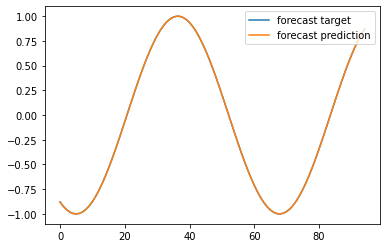

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[N//2:]
validation_predictions = []

# first validation input
last_x = X[N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

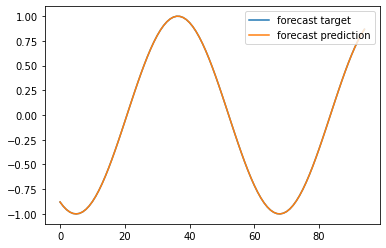

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()